#Loading every datasets

In [4]:
# Importing required libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [3]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#checking null values and object type

In [4]:
# Basic EDA for all datasets
print("Customers Dataset Overview:\n", customers.info(), "\n")
print("Products Dataset Overview:\n", products.info(), "\n")
print("Transactions Dataset Overview:\n", transactions.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers Dataset Overview:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products Dataset Overview:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          

#Checking missing values

In [5]:
# Missing values
print("Missing Values:\n")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


#checking any duplicate rows are there or not

In [6]:
# Duplicate rows
print("\nDuplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())


Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


#ploting the number of customers from each region

/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_33217/270241083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


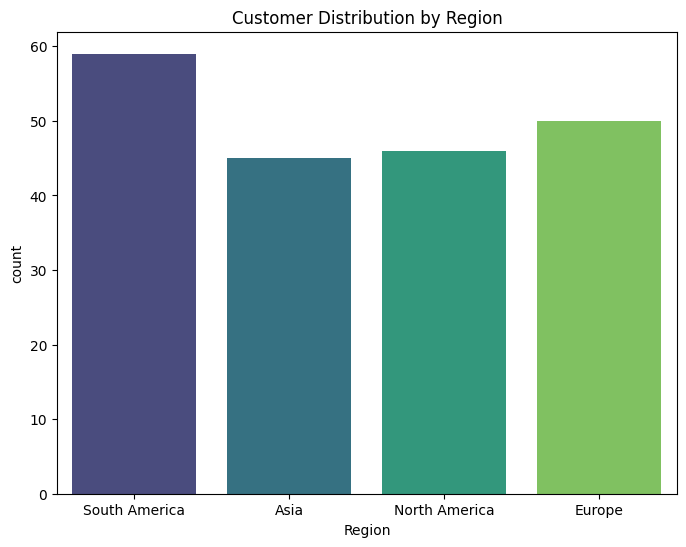

In [7]:
# Visualizing Customer Region distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.show()


#Ploting the product distribution through category

/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_33217/978458158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y="Category", palette="mako", order=products['Category'].value_counts().index)


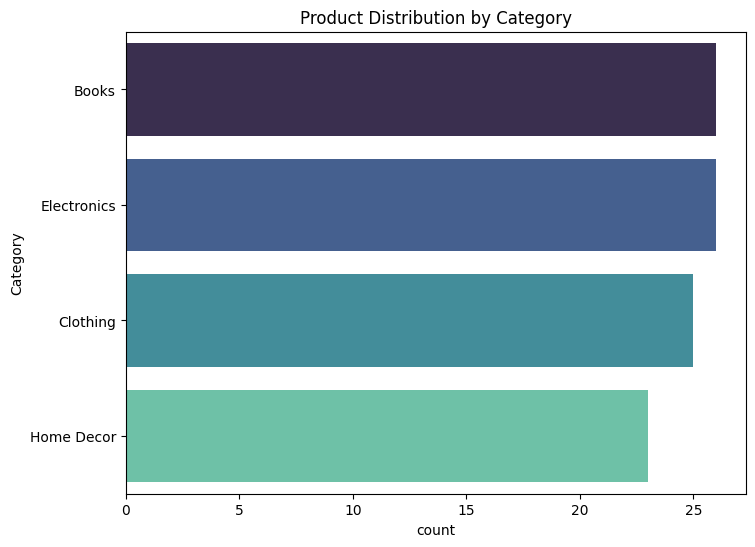

In [8]:
# Visualizing Product Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=products, y="Category", palette="mako", order=products['Category'].value_counts().index)
plt.title("Product Distribution by Category")
plt.show()

#Plotting monthly transaction

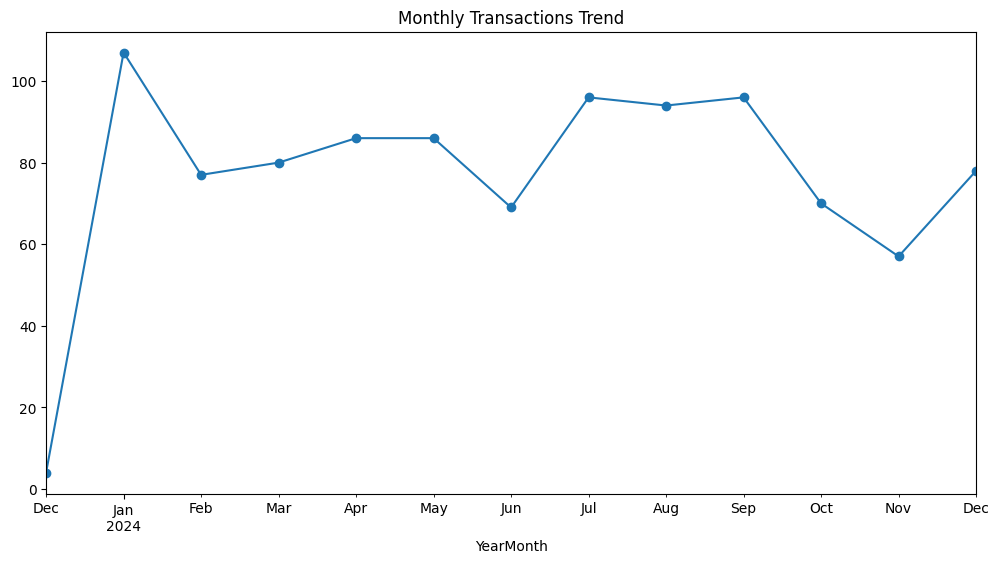

In [9]:
# Monthly transaction trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

monthly_transactions = transactions.groupby('YearMonth').size()
monthly_transactions.plot(kind='line', figsize=(12, 6), marker='o', title="Monthly Transactions Trend")
plt.show()

In [10]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024-10
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024-06
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024-04
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024-09


In [11]:
# Extract the year from 'TransactionDate'
transactions['Year'] = transactions['TransactionDate'].dt.year

# Get the total number of unique years
unique_years_count = transactions['Year'].nunique()

print(f"Total unique years: {unique_years_count}")


Total unique years: 2


#plotting the different years transaction history separately (this shows that we have only few transaction from 2023)

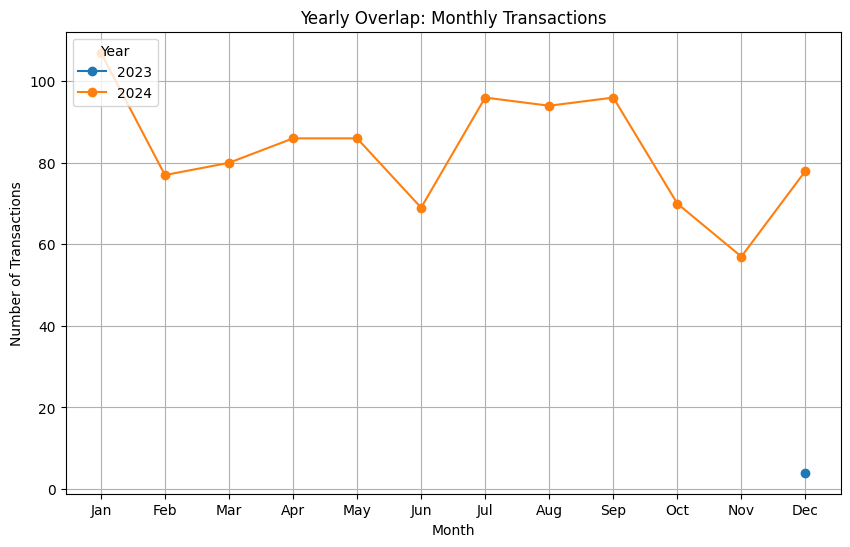

In [12]:
import matplotlib.pyplot as plt

# Extract year and month from the TransactionDate
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month

# Group by year and month to count transactions
yearly_data = transactions.groupby(['Year', 'Month']).size().reset_index(name='TransactionCount')

# Pivot the data to create a matrix where each year is a column
yearly_pivot = yearly_data.pivot(index='Month', columns='Year', values='TransactionCount')

# Plot the yearly overlaps
plt.figure(figsize=(10, 6))
for year in yearly_pivot.columns:
    plt.plot(yearly_pivot.index, yearly_pivot[year], label=year, marker='o')

# Add plot details
plt.title("Yearly Overlap: Monthly Transactions")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year", loc="upper left")
plt.grid(True)
plt.show()


1st Insight- CLV

merged the two datasets by customerID

In [13]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')

# Convert dates to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Merge datasets on CustomerID
data = pd.merge(transactions, customers, on='CustomerID')

data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [14]:
# 1. Calculated the total revenue per customer
total_revenue = data.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_revenue.rename(columns={'TotalValue': 'TotalRevenue'}, inplace=True)
print(total_revenue)

    CustomerID  TotalRevenue
0        C0001       3354.52
1        C0002       1862.74
2        C0003       2725.38
3        C0004       5354.88
4        C0005       2034.24
..         ...           ...
194      C0196       4982.88
195      C0197       1928.65
196      C0198        931.83
197      C0199       1979.28
198      C0200       4758.60

[199 rows x 2 columns]


In [15]:
# 2. Calculated the number of transactions per customer
transaction_count = data.groupby('CustomerID')['TransactionID'].count().reset_index()
transaction_count.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)
print(transaction_count)

    CustomerID  TransactionCount
0        C0001                 5
1        C0002                 4
2        C0003                 4
3        C0004                 8
4        C0005                 3
..         ...               ...
194      C0196                 4
195      C0197                 3
196      C0198                 2
197      C0199                 4
198      C0200                 5

[199 rows x 2 columns]


In [16]:
# 3. calculated customer lifetime in months
customer_lifetime = data.groupby('CustomerID').agg(
    FirstTransaction=('TransactionDate', 'min'),
    LastTransaction=('TransactionDate', 'max')
).reset_index()
customer_lifetime['LifetimeMonths'] = (
    (customer_lifetime['LastTransaction'] - customer_lifetime['FirstTransaction']).dt.days / 30
).round()

print(customer_lifetime)

    CustomerID    FirstTransaction     LastTransaction  LifetimeMonths
0        C0001 2024-01-19 03:12:55 2024-11-02 17:04:16            10.0
1        C0002 2024-02-28 07:44:21 2024-12-03 01:41:41             9.0
2        C0003 2024-02-18 02:50:37 2024-08-24 18:54:04             6.0
3        C0004 2024-02-28 10:16:35 2024-12-23 14:13:52            10.0
4        C0005 2024-03-15 04:08:59 2024-11-04 00:30:22             8.0
..         ...                 ...                 ...             ...
194      C0196 2024-08-06 14:37:15 2024-12-15 03:43:35             4.0
195      C0197 2024-01-13 04:52:09 2024-12-27 18:20:31            12.0
196      C0198 2024-09-29 16:14:59 2024-10-04 18:31:12             0.0
197      C0199 2024-08-17 12:06:08 2024-10-26 00:01:58             2.0
198      C0200 2024-04-27 19:06:20 2024-12-11 03:05:50             8.0

[199 rows x 4 columns]


In [17]:
# merged metrics into a single DataFrame
clv_data = pd.merge(total_revenue, transaction_count, on='CustomerID')
clv_data = pd.merge(clv_data, customer_lifetime[['CustomerID', 'LifetimeMonths']], on='CustomerID')
clv_data['AverageFrequency'] = clv_data['TransactionCount'] / clv_data['LifetimeMonths']
clv_data['CLV'] = clv_data['TotalRevenue'] * clv_data['AverageFrequency']
print(clv_data)

    CustomerID  TotalRevenue  TransactionCount  LifetimeMonths  \
0        C0001       3354.52                 5            10.0   
1        C0002       1862.74                 4             9.0   
2        C0003       2725.38                 4             6.0   
3        C0004       5354.88                 8            10.0   
4        C0005       2034.24                 3             8.0   
..         ...           ...               ...             ...   
194      C0196       4982.88                 4             4.0   
195      C0197       1928.65                 3            12.0   
196      C0198        931.83                 2             0.0   
197      C0199       1979.28                 4             2.0   
198      C0200       4758.60                 5             8.0   

     AverageFrequency          CLV  
0            0.500000  1677.260000  
1            0.444444   827.884444  
2            0.666667  1816.920000  
3            0.800000  4283.904000  
4            0.375000 

#As some customers had 0 lifetime the CLV was coming out to be infinite so we have dropped those rows as they were not in large size

In [18]:
clv_data = clv_data.replace([float('inf'), float('nan')], pd.NA).dropna(subset=['CLV'])

#Caraterized the customers in three segments (low,medium,high) through CLV

In [19]:
clv_data['CLVSegment'] = pd.qcut(clv_data['CLV'], q=3, labels=['Low', 'Medium', 'High'])
print(clv_data)

    CustomerID  TotalRevenue  TransactionCount  LifetimeMonths  \
0        C0001       3354.52                 5            10.0   
1        C0002       1862.74                 4             9.0   
2        C0003       2725.38                 4             6.0   
3        C0004       5354.88                 8            10.0   
4        C0005       2034.24                 3             8.0   
..         ...           ...               ...             ...   
193      C0195       4036.27                 6             9.0   
194      C0196       4982.88                 4             4.0   
195      C0197       1928.65                 3            12.0   
197      C0199       1979.28                 4             2.0   
198      C0200       4758.60                 5             8.0   

    AverageFrequency          CLV CLVSegment  
0                0.5      1677.26     Medium  
1           0.444444   827.884444        Low  
2           0.666667      1816.92     Medium  
3                0.

#HERE have plotted toal customers in each segment

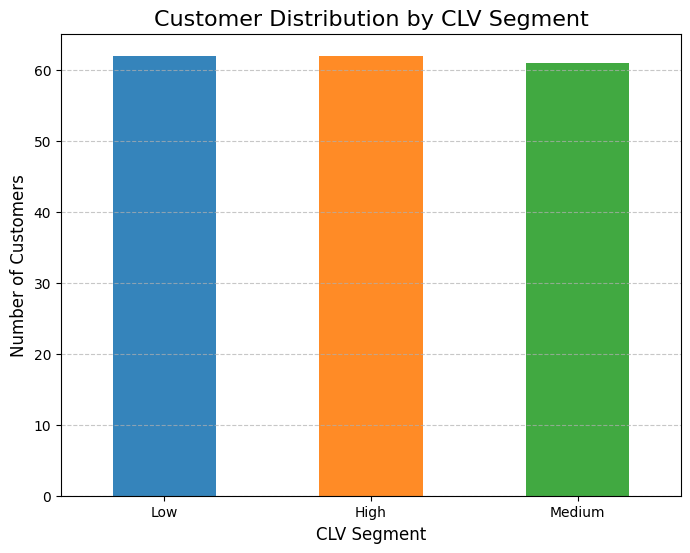

In [20]:
import matplotlib.pyplot as plt


segment_counts = clv_data['CLVSegment'].value_counts()


plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.9)
plt.title('Customer Distribution by CLV Segment', fontsize=16)
plt.xlabel('CLV Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Average CLV per segment

/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_33217/2815078923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_clv_per_segment = clv_data.groupby('CLVSegment')['CLV'].mean()


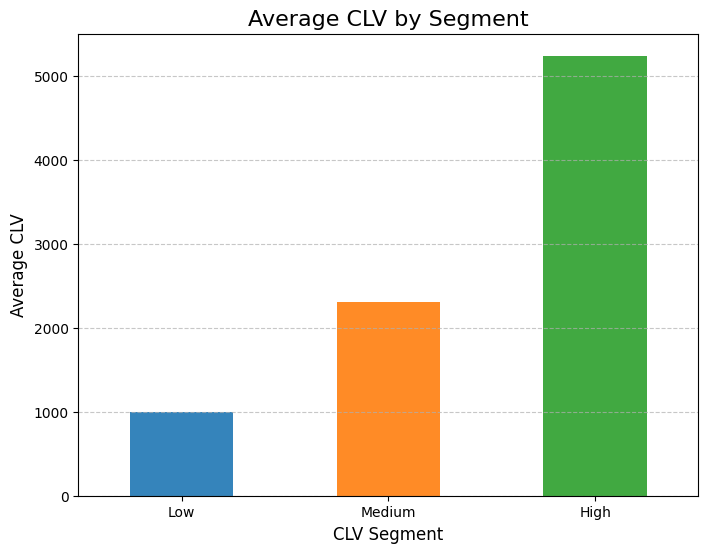

In [21]:
avg_clv_per_segment = clv_data.groupby('CLVSegment')['CLV'].mean()

plt.figure(figsize=(8, 6))
avg_clv_per_segment.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.9)
plt.title('Average CLV by Segment', fontsize=16)
plt.xlabel('CLV Segment', fontsize=12)
plt.ylabel('Average CLV', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/14/wryybrhn7vs_rn8bd161jqjh0000gn/T/ipykernel_33217/380141177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clv_data, x='CLVSegment', y='CLV', palette='Set2')


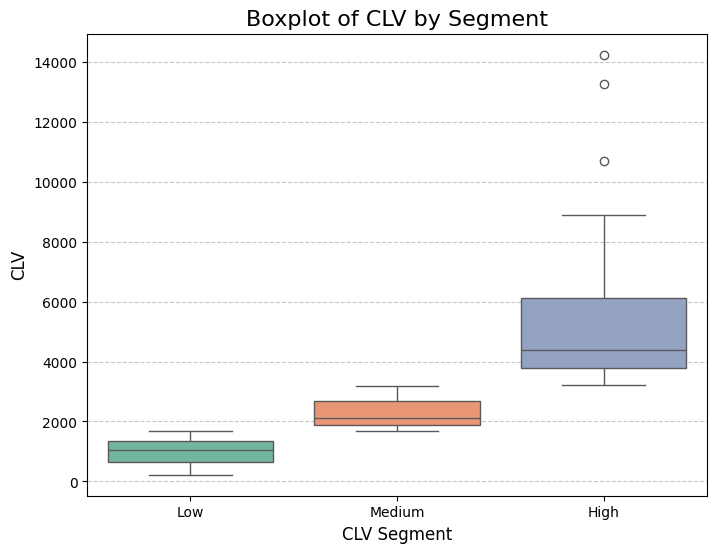

In [22]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=clv_data, x='CLVSegment', y='CLV', palette='Set2')
plt.title('Boxplot of CLV by Segment', fontsize=16)
plt.xlabel('CLV Segment', fontsize=12)
plt.ylabel('CLV', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Knowing the 10 most valuable customers

    CustomerID          CLV
152      C0153     14234.37
81       C0082   13252.5925
140      C0141     10673.87
174      C0175  8872.185714
103      C0104  8772.133333
180      C0182  8301.283333
64       C0065       7663.7
53       C0054  7147.013333
44       C0045  7025.433333
155      C0156  6998.245833


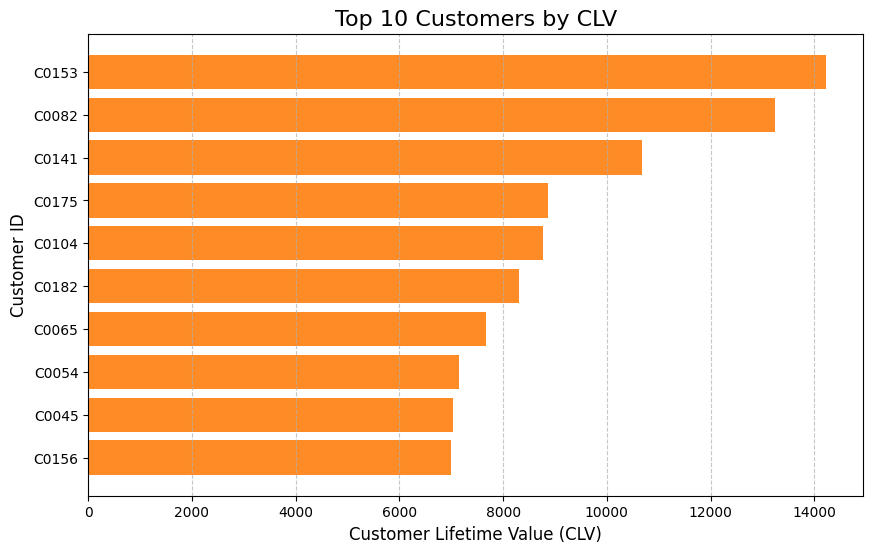

In [23]:
top_customers = clv_data.sort_values(by='CLV', ascending=False).head(10)

print(top_customers[['CustomerID', 'CLV']])

plt.figure(figsize=(10, 6))
plt.barh(top_customers['CustomerID'].astype(str), top_customers['CLV'], color='#ff7f0e', alpha=0.9)
plt.title('Top 10 Customers by CLV', fontsize=16)
plt.xlabel('Customer Lifetime Value (CLV)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


  CustomerID          CLV         Region
0      C0153     14234.37  South America
1      C0082   13252.5925  South America
2      C0141     10673.87         Europe
3      C0175  8872.185714           Asia
4      C0104  8772.133333  South America
5      C0182  8301.283333         Europe
6      C0065       7663.7  North America
7      C0054  7147.013333           Asia
8      C0045  7025.433333           Asia
9      C0156  6998.245833  North America


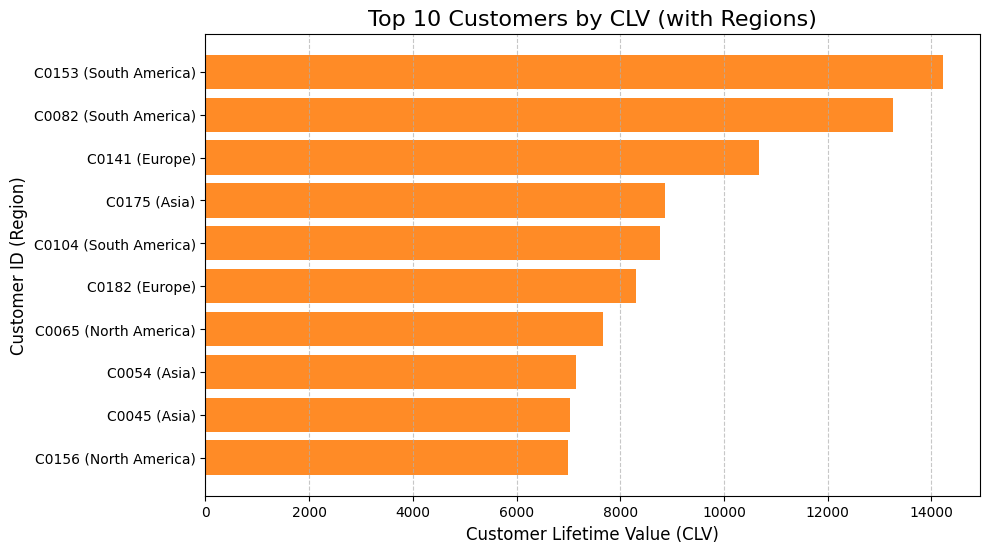

In [24]:
# Assuming the `customers` DataFrame contains `CustomerID` and `Region` columns.
# Merge top_customers with the customers DataFrame to get the region information
top_customers_with_regions = top_customers.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Display the top customers with their regions and CLV
print(top_customers_with_regions[['CustomerID', 'CLV', 'Region']])

# Plot updated bar chart with regions
plt.figure(figsize=(10, 6))
plt.barh(
    top_customers_with_regions['CustomerID'].astype(str) + ' (' + top_customers_with_regions['Region'] + ')', 
    top_customers_with_regions['CLV'], 
    color='#ff7f0e', alpha=0.9
)
plt.title('Top 10 Customers by CLV (with Regions)', fontsize=16)
plt.xlabel('Customer Lifetime Value (CLV)', fontsize=12)
plt.ylabel('Customer ID (Region)', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

    CustomerID         CLV
31       C0032  224.333333
82       C0083      241.05
94       C0095  285.393333
127      C0128     309.276
76       C0077    313.9875
14       C0015  330.708571
8        C0009  384.214286
62       C0063      459.39
195      C0197    482.1625
88       C0089     511.244


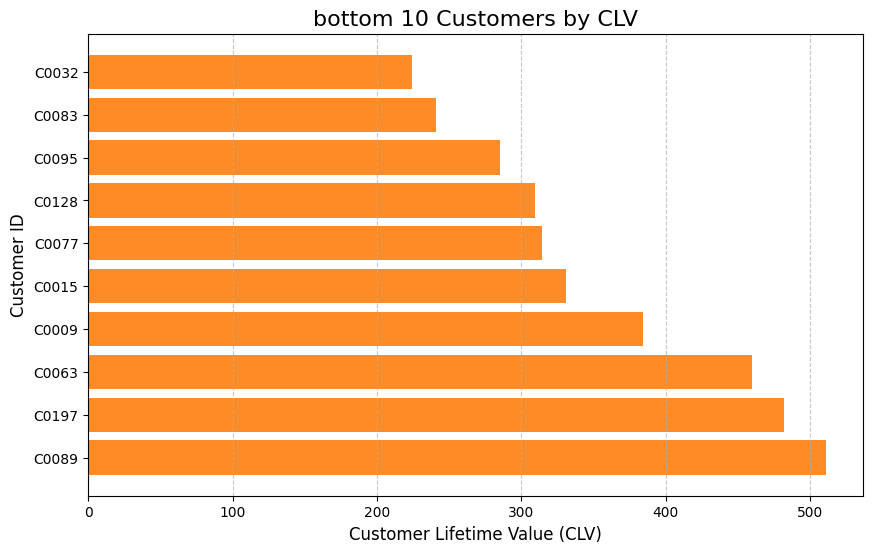

In [25]:
bottom_customers = clv_data.sort_values(by='CLV', ascending=True).head(10)

print(bottom_customers[['CustomerID', 'CLV']])

plt.figure(figsize=(10, 6))
plt.barh(bottom_customers['CustomerID'].astype(str), bottom_customers['CLV'], color='#ff7f0e', alpha=0.9)
plt.title('bottom 10 Customers by CLV', fontsize=16)
plt.xlabel('Customer Lifetime Value (CLV)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [26]:
print(transactions.columns)
print(products.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')


2nd insight-Product Category Sales Trends Over Time



In [27]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

merged_data = pd.merge(transactions, products[['ProductID', 'Category']], on='ProductID', how='left')

In [28]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'Category'],
      dtype='object')


In [29]:
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     Category  
0      300.68  300.68  Electronics  
1      300.68  300.68  Electronics  
2      300.68  300.68  Electronics  
3      601.36  300.68  Electronics  
4      902.04  300.68  Electronics  


In [30]:
# Recreate the 'YearMonth' column to ensure it's correct
merged_data['YearMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.to_period('M')


In [31]:
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     Category YearMonth  
0      300.68  300.68  Electronics   2024-08  
1      300.68  300.68  Electronics   2024-05  
2      300.68  300.68  Electronics   2024-04  
3      601.36  300.68  Electronics   2024-03  
4      902.04  300.68  Electronics   2024-03  


In [32]:
# Group by YearMonth and Category, and sum the TotalValue for each group
category_sales = merged_data.groupby(['YearMonth', 'Category'])['TotalValue'].sum().reset_index(name='TotalSales')


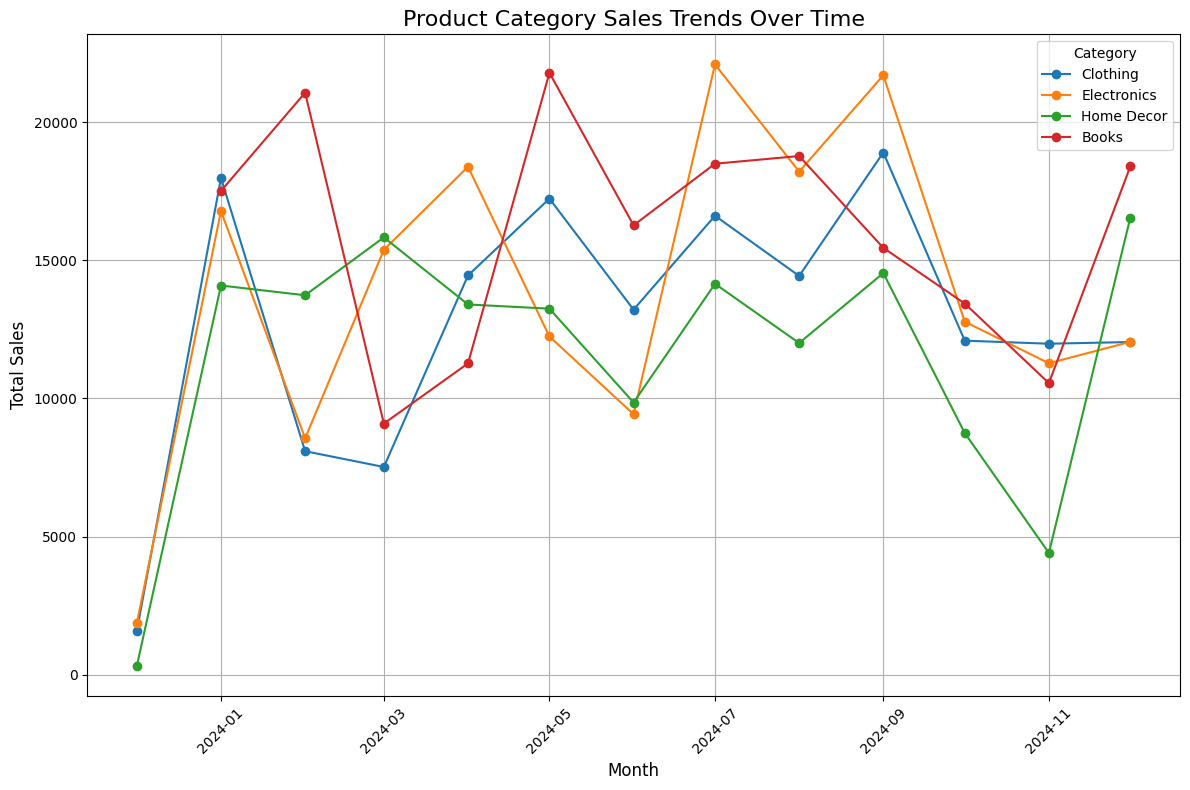

In [33]:
# Convert YearMonth to datetime
category_sales['YearMonth'] = category_sales['YearMonth'].dt.to_timestamp()

# Plot the sales trends for each category over time
plt.figure(figsize=(12, 8))

# Loop through each category and plot its sales over time
for category in category_sales['Category'].unique():
    category_data = category_sales[category_sales['Category'] == category]
    plt.plot(category_data['YearMonth'], category_data['TotalSales'], label=category, marker='o')

# Add plot details
plt.title('Product Category Sales Trends Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
#3rd insight-Region-Based Segmentation for Marketing and Inventory

In [35]:
import pandas as pd

# Load datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')

# Merge transactions with customer data to get region info for each transaction
merged_data = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID', how='left')


In [36]:
merged_data = merged_data.drop(columns=['TransactionDate'])


In [37]:
merged_data.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Region
0,T00001,C0199,P067,1,300.68,300.68,Europe
1,T00112,C0146,P067,1,300.68,300.68,Asia
2,T00166,C0127,P067,1,300.68,300.68,Europe
3,T00272,C0087,P067,2,601.36,300.68,South America
4,T00363,C0070,P067,3,902.04,300.68,Europe


In [38]:
customer_spend = merged_data.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index(name='TotalSpend')


In [39]:
print(customer_spend)

    CustomerID         Region  TotalSpend
0        C0001  South America     3354.52
1        C0002           Asia     1862.74
2        C0003  South America     2725.38
3        C0004  South America     5354.88
4        C0005           Asia     2034.24
..         ...            ...         ...
194      C0196         Europe     4982.88
195      C0197         Europe     1928.65
196      C0198         Europe      931.83
197      C0199         Europe     1979.28
198      C0200           Asia     4758.60

[199 rows x 3 columns]


In [40]:
region_sales = customer_spend.groupby('Region')['TotalSpend'].sum().reset_index(name='TotalSpend')

In [41]:
print(region_sales)

          Region  TotalSpend
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


In [42]:
region_product_demand = merged_data.groupby(['Region'])['Quantity'].sum().reset_index(name='TotalQuantity')

# Optionally, you can view the aggregated data (e.g., for analysis or visualization)
print(region_sales.head())
print(region_product_demand.head())

          Region  TotalSpend
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56
          Region  TotalQuantity
0           Asia            560
1         Europe            595
2  North America            593
3  South America            789


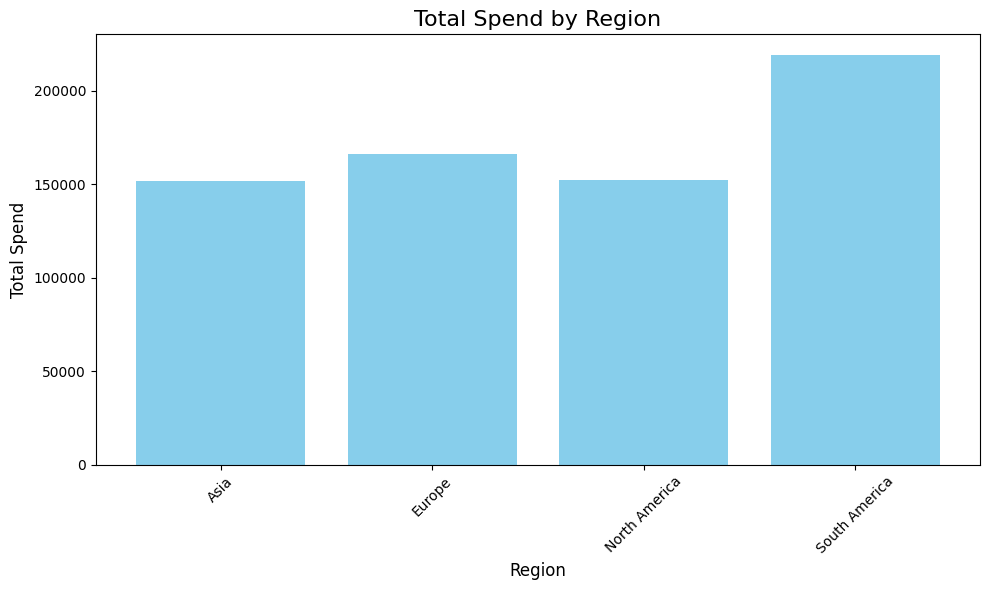

In [43]:
import matplotlib.pyplot as plt

# Plotting Total Spend by Region
plt.figure(figsize=(10, 6))
plt.bar(region_sales['Region'], region_sales['TotalSpend'], color='skyblue')
plt.title('Total Spend by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


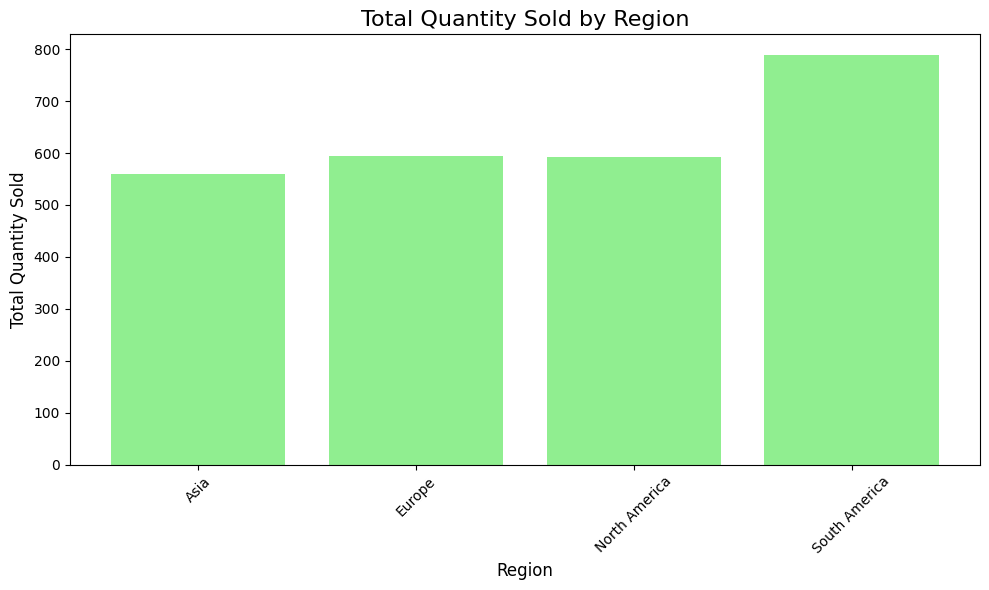

In [44]:
# Plotting Total Quantity by Region
plt.figure(figsize=(10, 6))
plt.bar(region_sales['Region'], region_product_demand.groupby('Region')['TotalQuantity'].sum(), color='lightgreen')
plt.title('Total Quantity Sold by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
#

In [46]:
merged_data.head()

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Region
0,T00001,C0199,P067,1,300.68,300.68,Europe
1,T00112,C0146,P067,1,300.68,300.68,Asia
2,T00166,C0127,P067,1,300.68,300.68,Europe
3,T00272,C0087,P067,2,601.36,300.68,South America
4,T00363,C0070,P067,3,902.04,300.68,Europe


In [47]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [48]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [49]:
unique_customer_count = merged_data["CustomerID"].nunique()
print(unique_customer_count)

199


In [50]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1000 non-null   object 
 1   CustomerID     1000 non-null   object 
 2   ProductID      1000 non-null   object 
 3   Quantity       1000 non-null   int64  
 4   TotalValue     1000 non-null   float64
 5   Price          1000 non-null   float64
 6   Region         1000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB



Regional Distribution:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


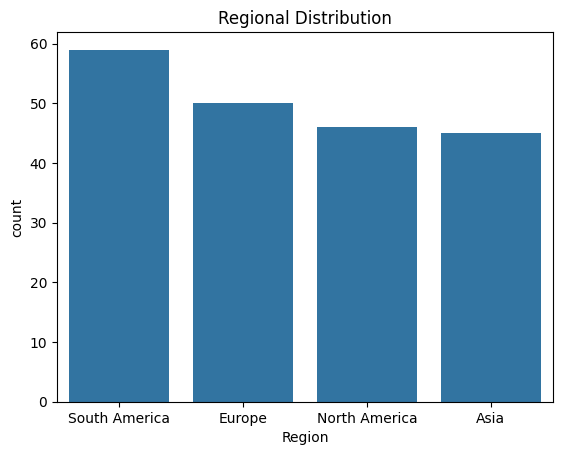

In [51]:
# Regional Distribution
print("\nRegional Distribution:\n", customers['Region'].value_counts())

# Visualizing regional distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title("Regional Distribution")
plt.show()


Repeat Purchases:
Find out how many customers made multiple purchases. This indicates customer loyalty and helps in retention strategies.


In [52]:
import pandas as pd

# Load the Transactions dataset
transactions = pd.read_csv('Transactions.csv')

# Ensure 'TransactionDate' is in datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [53]:
# Group by CustomerID and count the number of purchases
customer_purchases = transactions.groupby('CustomerID').size().reset_index(name='PurchaseCount')

# Display customers who have made more than one purchase
repeat_customers = customer_purchases[customer_purchases['PurchaseCount'] > 1]

# Number of customers with repeat purchases
repeat_customers_count = repeat_customers.shape[0]

print(f"Number of customers with repeat purchases: {repeat_customers_count}")


Number of customers with repeat purchases: 187


In [54]:
# Count the number of customers by their purchase frequency
purchase_frequency = customer_purchases['PurchaseCount'].value_counts().reset_index()
purchase_frequency.columns = ['PurchaseCount', 'CustomerCount']

# Display the breakdown of purchase frequency
print(purchase_frequency)


    PurchaseCount  CustomerCount
0               5             42
1               4             31
2               3             31
3               6             25
4               8             20
5               7             18
6               1             12
7               2              9
8               9              5
9              10              4
10             11              2


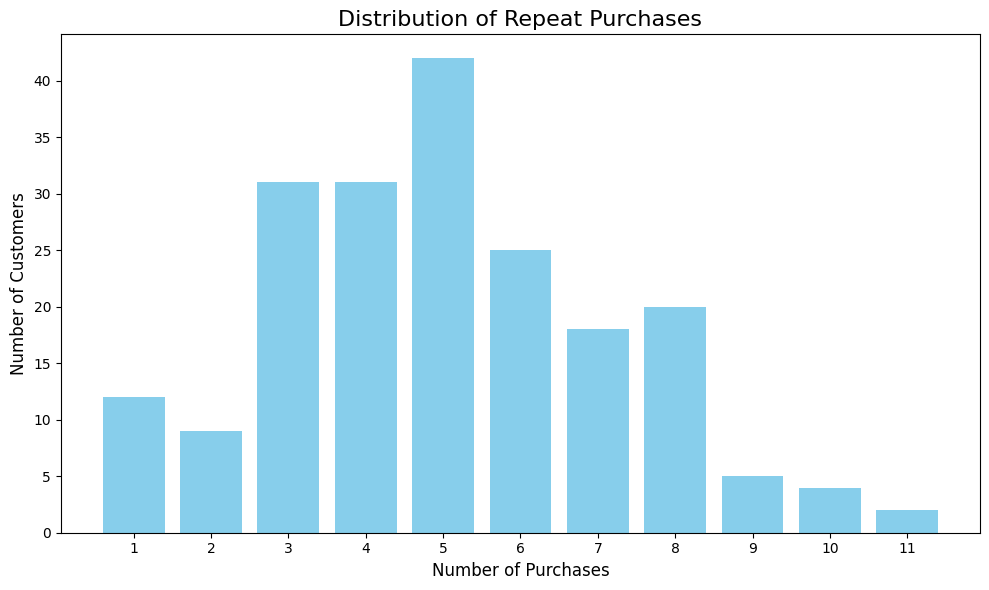

In [55]:
import matplotlib.pyplot as plt

# Plotting the purchase frequency distribution
plt.figure(figsize=(10, 6))
plt.bar(purchase_frequency['PurchaseCount'], purchase_frequency['CustomerCount'], color='skyblue')
plt.title('Distribution of Repeat Purchases', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(purchase_frequency['PurchaseCount'])
plt.tight_layout()
plt.show()


In [67]:
# Ensure SignupDate is in datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Extract Year-Month for grouping
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')

# Group by YearMonth and count signups
monthly_signups = customers.groupby('YearMonth').size()

# Display the first few rows
print(monthly_signups)


YearMonth
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, dtype: int64


YearMonth
2022-01           NaN
2022-02    600.000000
2022-03     14.285714
2022-04      0.000000
2022-05      0.000000
2022-06    -37.500000
2022-07    -20.000000
2022-08      0.000000
2022-09     50.000000
2022-10    -50.000000
2022-11      0.000000
2022-12    133.333333
2023-01    -28.571429
2023-02     20.000000
2023-03     33.333333
2023-04    -25.000000
2023-05    -50.000000
2023-06      0.000000
2023-07      0.000000
2023-08    -33.333333
2023-09    100.000000
2023-10     75.000000
2023-11    -28.571429
2023-12      0.000000
2024-01     80.000000
2024-02    -11.111111
2024-03    -50.000000
2024-04    150.000000
2024-05    -40.000000
2024-06    -33.333333
2024-07     50.000000
2024-08    -33.333333
2024-09    175.000000
2024-10    -54.545455
2024-11    120.000000
2024-12    -90.909091
Freq: M, dtype: float64


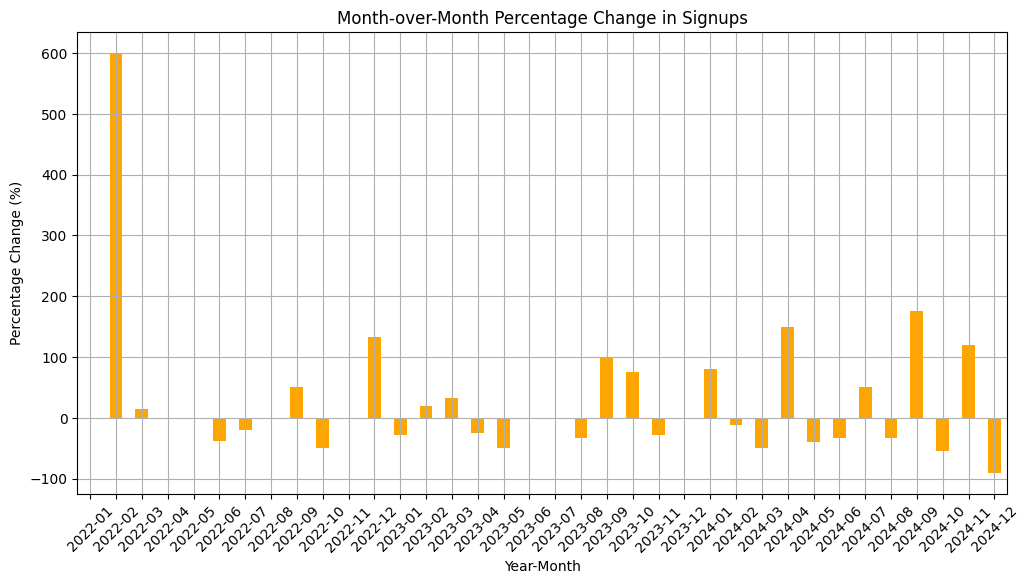

In [68]:
# Calculate month-over-month percentage change
monthly_signups_change = monthly_signups.pct_change() * 100

# Display the change in signups
print(monthly_signups_change)

# Visualize the change
monthly_signups_change.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Month-over-Month Percentage Change in Signups")
plt.xlabel("Year-Month")
plt.ylabel("Percentage Change (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [60]:
#5TH INSIGHT TOP 1% AND BOTTOM 1%

In [61]:
transactions_with_details = transactions.merge(products, on='ProductID', how='left')
transactions_with_details = transactions_with_details.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

(transactions_with_details)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,Region
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Asia
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,South America
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,South America
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,North America
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,North America
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Asia


In [62]:
# Define the threshold for the bottom 1% CLV customers
top_threshold = clv_data['CLV'].quantile(0.99)

# Filter for bottom 1% customers
top_1_percent_customers = clv_data[clv_data['CLV'] <= top_threshold]


top_1_percent_transactions = transactions_with_details[
    transactions_with_details['CustomerID'].isin(top_1_percent_customers['CustomerID'])
]

(top_1_percent_transactions)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,Region
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Asia
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,South America
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,South America
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,North America
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,North America
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Asia


In [63]:
# Step 1: Convert 'TransactionDate' to datetime
transactions_with_details['TransactionDate'] = pd.to_datetime(transactions_with_details['TransactionDate'])

# Step 2: Extract the 'Month' from 'TransactionDate'
transactions_with_details['Month'] = transactions_with_details['TransactionDate'].dt.month
transactions_with_details

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,Region,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Asia,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,South America,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Europe,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,South America,10
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,North America,6
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,North America,4
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Asia,9


In [64]:
# Use the correct column name after merging
# `Price_y` is the product's price column after merging
# `Price_x` is likely the same as TotalValue / Quantity in the original transactions
top_1_percent_transactions = transactions_with_details[
    transactions_with_details['CustomerID'].isin(top_1_percent_customers['CustomerID'])
]

# Use the correct price column for analysis
# Assuming `Price_y` is the correct one to use (product's price after the merge)
average_spending = top_1_percent_transactions['Price_y'].mean()

# Most frequently purchased category
most_frequent_category = (
    top_1_percent_transactions.groupby('Category')['Price_y'].sum()
    .idxmax()
)

# Month with the highest spending
month_with_highest_spending = (
    top_1_percent_transactions.groupby('Month')['Price_y'].sum()
    .idxmax()
)

# Spending by region
spending_by_region = (
    top_1_percent_transactions.groupby('Region')['Price_y'].sum()
    .sort_values(ascending=False)
)

# Output the results
print("Top 1% Customers Analysis:")
print(f"Average Spending: ${average_spending:.2f}")
print(f"Most Frequently Purchased Category: {most_frequent_category}")
print(f"Month with the Highest Spending: {month_with_highest_spending}")
print("\nSpending by Region:")
print(spending_by_region)



Top 1% Customers Analysis:
Average Spending: $272.74
Most Frequently Purchased Category: Books
Month with the Highest Spending: 1

Spending by Region:
Region
South America    79469.21
Europe           63803.23
North America    63622.77
Asia             57933.31
Name: Price_y, dtype: float64


In [65]:
# Define the threshold for the bottom 1% CLV customers
bottom_threshold = clv_data['CLV'].quantile(0.01)

# Filter for bottom 1% customers
bottom_1_percent_customers = clv_data[clv_data['CLV'] <= bottom_threshold]

# Merge bottom_1_percent_customers with transactions and product details
bottom_1_percent_transactions = transactions_with_details[
    transactions_with_details['CustomerID'].isin(bottom_1_percent_customers['CustomerID'])
]

# Average spending of bottom 1% customers
average_spending_bottom = bottom_1_percent_transactions['Price_y'].mean()

# Most frequently purchased category for bottom 1% customers
most_frequent_category_bottom = (
    bottom_1_percent_transactions.groupby('Category')['Price_y'].sum()
    .idxmax()
)

# Month with the highest spending for bottom 1% customers
month_with_highest_spending_bottom = (
    bottom_1_percent_transactions.groupby('Month')['Price_y'].sum()
    .idxmax()
)

# Spending by region for bottom 1% customers
spending_by_region_bottom = (
    bottom_1_percent_transactions.groupby('Region')['Price_y'].sum()
    .sort_values(ascending=False)
)

# Output the results for bottom 1% customers
print("Bottom 1% Customers Analysis:")
print(f"Average Spending: ${average_spending_bottom:.2f}")
print(f"Most Frequently Purchased Category: {most_frequent_category_bottom}")
print(f"Month with the Highest Spending: {month_with_highest_spending_bottom}")
print("\nSpending by Region:")
print(spending_by_region_bottom)

# Merge bottom_customers with the customers DataFrame to get region information
bottom_customers_with_regions = bottom_1_percent_customers.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Display the bottom customers with their regions and CLV
print(bottom_customers_with_regions[['CustomerID', 'CLV', 'Region']])


Bottom 1% Customers Analysis:
Average Spending: $188.33
Most Frequently Purchased Category: Clothing
Month with the Highest Spending: 11

Spending by Region:
Region
South America    1130.0
Name: Price_y, dtype: float64
  CustomerID         CLV         Region
0      C0032  224.333333  South America
1      C0083      241.05  South America


Lookalike Model completed! Results saved in Lookalike.csv
